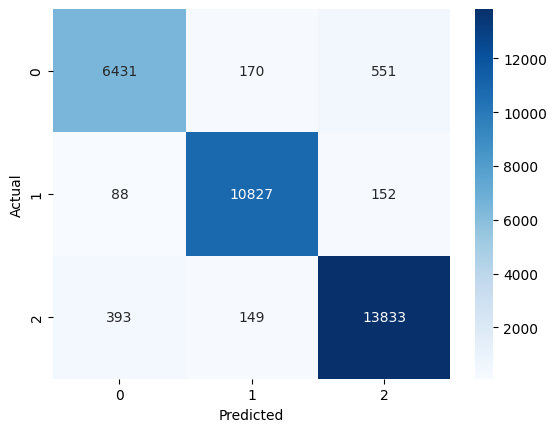

Accuracy: 0.9538872185064736
Precision: 0.9536830703198759
Recall: 0.9538872185064736
F1 Score: 0.9537094142922152


In [ ]:
# SVM
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Twitter_Data.csv")

# Drop rows with missing values
data.dropna(subset=['sentiment', 'text'], inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_raw = vectorizer.fit_transform(train_data['text']) # feature extraction done on tweets and stored that matrix in X_train_raw
y_train = train_data['sentiment'] # and the sentiment of it is as it is
X_test_raw = vectorizer.transform(test_data['text'])
y_test = test_data['sentiment']

# Apply feature selection to the training and testing data seperately
selector = SelectKBest(chi2, k=5000)
selector.fit(X_train_raw, y_train) # feature selection on feature extracted matrix and sentiment labled data
X_train = selector.transform(X_train_raw) # storde in X_train
X_test = selector.transform(X_test_raw)

# Train the SVM model
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


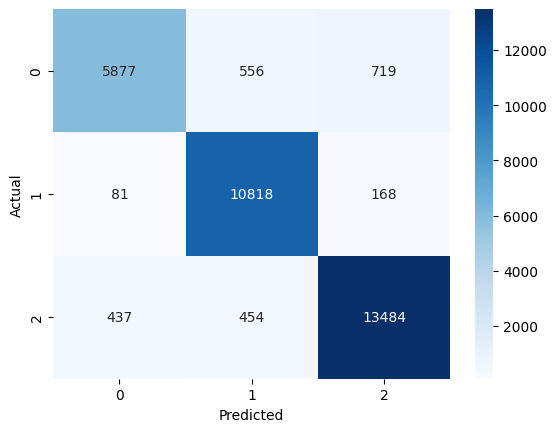

Accuracy: 0.9259066085782659
Precision: 0.9260114673731489
Recall: 0.9259066085782659
F1 Score: 0.9250077946052861


In [ ]:
# logistic regression
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Twitter_Data.csv")

# Drop rows with missing values
data.dropna(subset=['sentiment', 'text'], inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_raw = vectorizer.fit_transform(train_data['text'])
y_train = train_data['sentiment']
X_test_raw = vectorizer.transform(test_data['text'])
y_test = test_data['sentiment']

# Apply feature selection to the training and testing data separately
selector = SelectKBest(chi2, k=5000)
selector.fit(X_train_raw, y_train)
X_train = selector.transform(X_train_raw)
X_test = selector.transform(X_test_raw)

# Train the logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


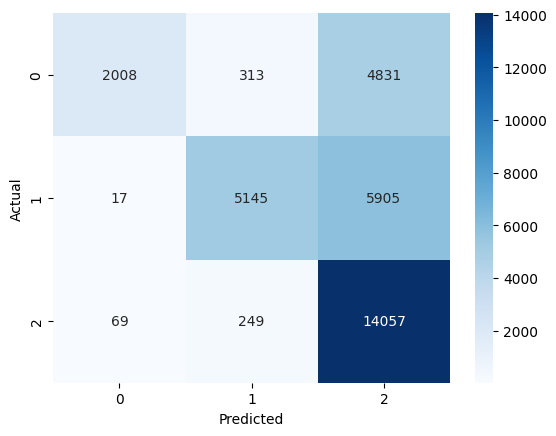

Accuracy: 0.6507332637908818
Precision: 0.7665735873089784
Recall: 0.6507332637908818
F1 Score: 0.6201632322901067


In [ ]:
# Naive Bayes
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Twitter_Data.csv")

# Drop rows with missing values
data.dropna(subset=['sentiment', 'text'], inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['text'])
y_train = train_data['sentiment']
X_test = vectorizer.transform(test_data['text'])
y_test = test_data['sentiment']

# Perform feature selection using chi-squared test
selector = SelectKBest(chi2, k=1000)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Train the Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


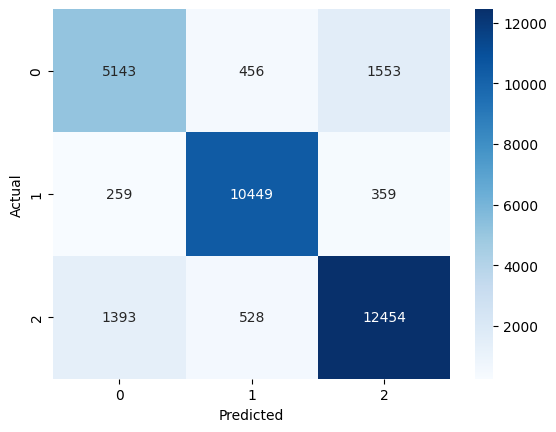

Accuracy: 0.8604651162790697
Precision: 0.8587319367493234
Recall: 0.8604651162790697
F1 Score: 0.859408919867762


In [ ]:
# decision tree
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Twitter_Data.csv")

# Drop rows with missing values
data.dropna(subset=['sentiment', 'text'], inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize the text data and select top 5000 features using chi-squared test
vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(train_data['text'])
selector = SelectKBest(chi2, k=5000)
X_train = selector.fit_transform(X_train_counts, train_data['sentiment'])
y_train = train_data['sentiment']
X_test_counts = vectorizer.transform(test_data['text'])
X_test = selector.transform(X_test_counts)
y_test = test_data['sentiment']

# Train the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
